Some of the code in this lab copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [5]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')
len(dates)

455

In [6]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# store the parameters
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [7]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# generate the time series according to the formula
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

Plot the time series and verify what you see

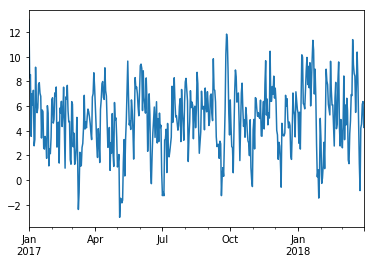

In [9]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# plot here
series = pd.Series(TS, index=dates)

series.plot();

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

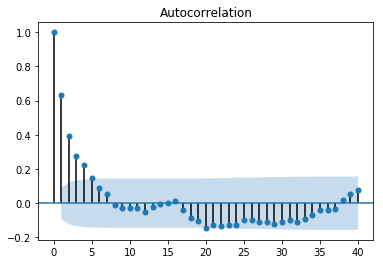

In [12]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# ACF 
plot_acf(series, lags=40);

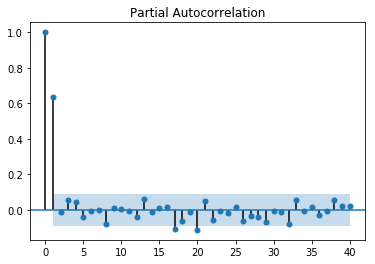

In [14]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# PACF 
plot_pacf(series, lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [15]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Sun, 10 Nov 2019   AIC                           1943.395
Time:                        22:49:52   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [17]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

# store the parameters
error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

#generate the time series
TS = [None] * len(dates)
prev_error = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + error[i] + theta * prev_error
    prev_error = error[i]

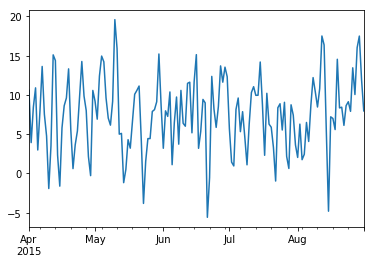

In [19]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# Plot the time series
series = pd.Series(TS, index=dates)
series.plot();

## Look at the ACF and PACF of your model and write down your conclusions

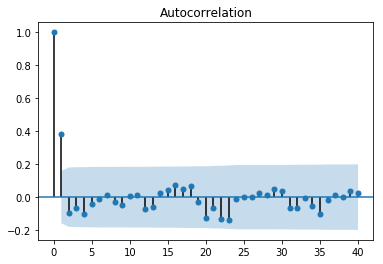

In [21]:
# ACF
plot_acf(series, lags=40);

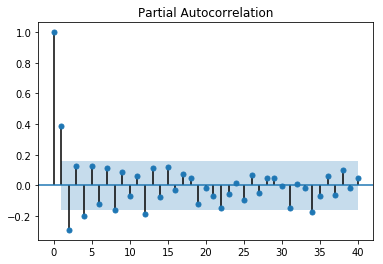

In [23]:
# PACF
plot_pacf(series, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [25]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Sun, 10 Nov 2019   AIC                            858.757
Time:                        22:59:36   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [32]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# the data is in "winning_400m.csv"
run = pd.read_csv('winning_400m.csv')
run.year = run.year.astype(str)
run.year = pd.to_datetime(run.year)
run.set_index('year', inplace=True)

Plot the data

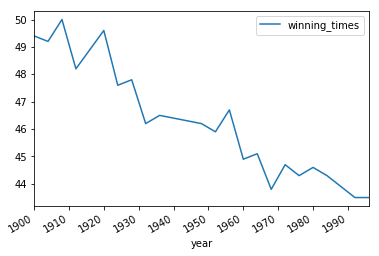

In [33]:
# your code here
run.plot();

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [35]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

run = run.diff(periods=1)
run = run.dropna()

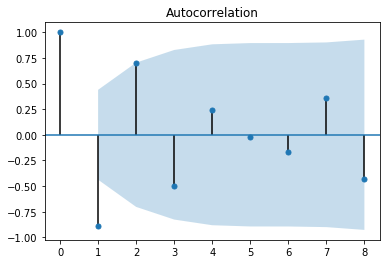

In [37]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# Look at ACF
plot_acf(run, lags=8);

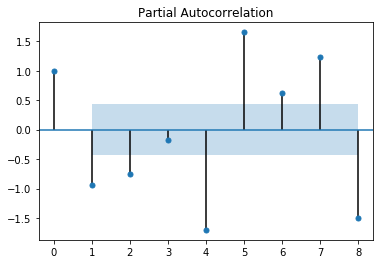

In [39]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

# look at PACF

plot_pacf(run, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [42]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

mod_arma = ARMA(run, order=(2,1))
res_arma = mod_arma.fit()

print(res_arma.summary())
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   20
Model:                     ARMA(2, 1)   Log Likelihood                 -21.322
Method:                       css-mle   S.D. of innovations              0.629
Date:                Sun, 10 Nov 2019   AIC                             52.645
Time:                        23:09:23   BIC                             57.623
Sample:                             0   HQIC                            53.617
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0055      0.017      0.328      0.747      -0.027       0.038
ar.L1.winning_times    -0.5876      0.248     -2.368      0.031      -1.074      -0.101
ar.L2.winning_ti

C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-arma-models-lab/tree/solution

mod_arma = ARMA(run, order=(2,2))
res_arma = mod_arma.fit()

print(res_arma.summary())
print(res_arma.params)

C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   20
Model:                     ARMA(2, 2)   Log Likelihood                 -21.319
Method:                       css-mle   S.D. of innovations              0.629
Date:                Sun, 10 Nov 2019   AIC                             54.637
Time:                        23:10:30   BIC                             60.612
Sample:                             0   HQIC                            55.804
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0054      0.017      0.317      0.755      -0.028       0.039
ar.L1.winning_times    -0.5403      0.596     -0.906      0.379      -1.709       0.628
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

In [44]:
# I would choose the arma(2,1) because it is less complex

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.